## ANN como regresores
Las redes neuronales tambien se pueden utilizar para predecir el valor de una funcion. En este caso vamos a probarlo con la funcion:
$$y = 3x^2 + 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nlb

In [6]:
# generamos los datos de entrenamiento
val_min = -15
val_max = 15
num_datos = 130
x = np.linspace(val_min, val_max, num_datos) # vector de 130 elementos entre -15 y 15
y = (3*x**2)+5 # funcion que queremos probar
y /= np.linalg.norm(y) # normalizamos los datos con la norma 1
# ordenamos los datos en un vector columna
x = np.vstack(x) # en las ANN se puede tener una sola caracteristica en la entrada y varias etiquetas en la salida
y = np.vstack(y)

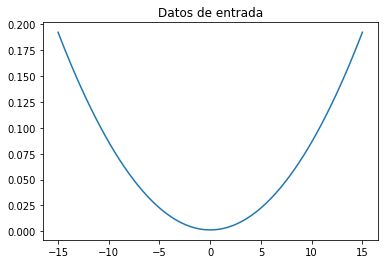

In [8]:
# graficamos la funcion de entrada
plt.figure()
plt.plot(x, y)
plt.title('Datos de entrada')
plt.show()

In [12]:
# definimos la red neuronal
nn = nl.net.newff([[val_min, val_max]], [10, 6, 1])
# dos capas ocultas
# establecemos el algoritmo de entrenamiento
nn.trainf = nl.train.train_gd # lo establecemos en gradiente descendiente
progreso_error = nn.train(x, y, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 3.4825250269149453;
Epoch: 200; Error: 0.3205061624522621;
Epoch: 300; Error: 0.033427507224996905;
Epoch: 400; Error: 0.09539097897784518;
Epoch: 500; Error: 0.02870699645671152;
Epoch: 600; Error: 0.02658883074822182;
Epoch: 700; Error: 0.025344439766717623;
Epoch: 800; Error: 0.020509033655657143;
Epoch: 900; Error: 0.02185582044125508;
Epoch: 1000; Error: 0.021605390486326415;
Epoch: 1100; Error: 0.018473105537763546;
Epoch: 1200; Error: 0.017457801083979443;
Epoch: 1300; Error: 0.018061217556922506;
Epoch: 1400; Error: 0.017542712315233917;
Epoch: 1500; Error: 0.015977978757620474;
Epoch: 1600; Error: 0.015220434809991454;
Epoch: 1700; Error: 0.01528775292661181;
Epoch: 1800; Error: 0.01501919367589672;
Epoch: 1900; Error: 0.014129663761429271;
Epoch: 2000; Error: 0.013421393124599645;
The maximum number of train epochs is reached


In [13]:
# corremos la red con los datos de validacion
salidas = nn.sim(x)
salidas = salidas.reshape(num_datos)

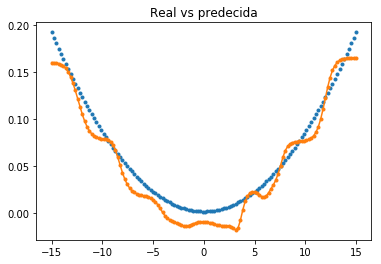

In [15]:
# graficamos la salida y la comparamos con la funcion original
plt.figure()
plt.plot(x, y, '.', x, salidas, '.-')
plt.title('Real vs predecida')
plt.show()